# Adult Census Income

## 1. Business Understanding
In this notebook we will answer 3 questions:  
**1. The impact of Education in Adult Income?**  
Education always plays a crucial point in defining whether a job has a good income. In this part, I will use EDA to answer that question.  
**2. Who are more likely to get a high salary job?**  
Based on the Census Data, I will continue EDA to explore which factors beside Education affect the most to the salary of US citizens.  
**3. Which model is the best way to predict salary range?**  
In this part, I will try applying several modelling techniques to define which one has the best performance to our dataset.

## 2. Data Understanding

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

In [2]:
# Importing dataset
dataset = pd.read_csv('adult.csv')

In [3]:
# Preview dataset
dataset.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Shape of dataset
dataset.shape

(32561, 15)

In [5]:
# Features data type & null info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
# Statistical summary
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education.num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital.gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital.loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [7]:
# Check for '?' in dataset
round((dataset.isin(['?']).sum() / dataset.shape[0]) * 100, 2).astype(str) + ' %'

age                0.0 %
workclass         5.64 %
fnlwgt             0.0 %
education          0.0 %
education.num      0.0 %
marital.status     0.0 %
occupation        5.66 %
relationship       0.0 %
race               0.0 %
sex                0.0 %
capital.gain       0.0 %
capital.loss       0.0 %
hours.per.week     0.0 %
native.country    1.79 %
income             0.0 %
dtype: object

In [8]:
# Checking the counts of label categories
income = dataset['income'].value_counts(normalize=True)
round(income * 100, 2).astype('str') + ' %'

income
<=50K    75.92 %
>50K     24.08 %
Name: proportion, dtype: object

> From the analysis, we can see that:
> - The dataset doesn't have any null values, but it contains missing values in the form of '?' which needs to be preprocessed.  
> - The dataset is unbalanced in the 'income' target with 75.92% having income less than 50k and 24.08% values having income more than 50k.

### ***Question 1: The impact of Education in Adult Income?***

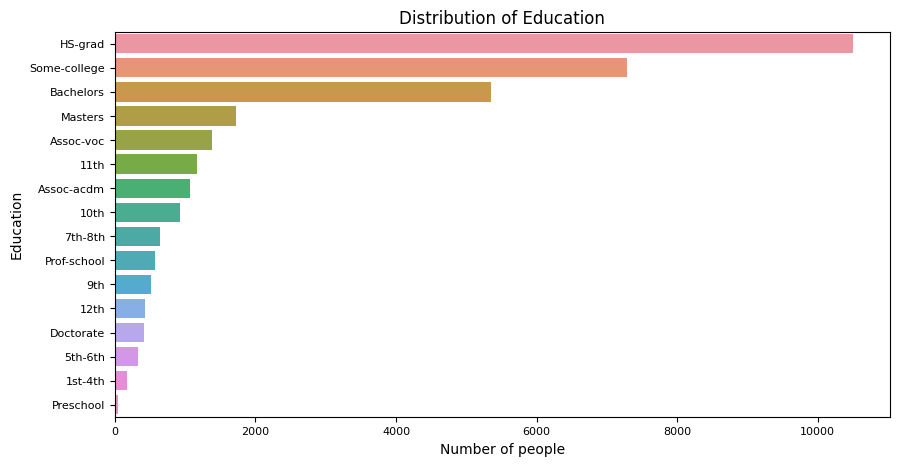

In [9]:
# Creating a barplot for 'Education'
edu = dataset['education'].value_counts()

plt.figure(figsize=(10, 5))
sns.barplot(x=edu.values, y=edu.index)
plt.title('Distribution of Education')
plt.xlabel('Number of people')
plt.ylabel('Education')
plt.tick_params(labelsize=8)
plt.show()

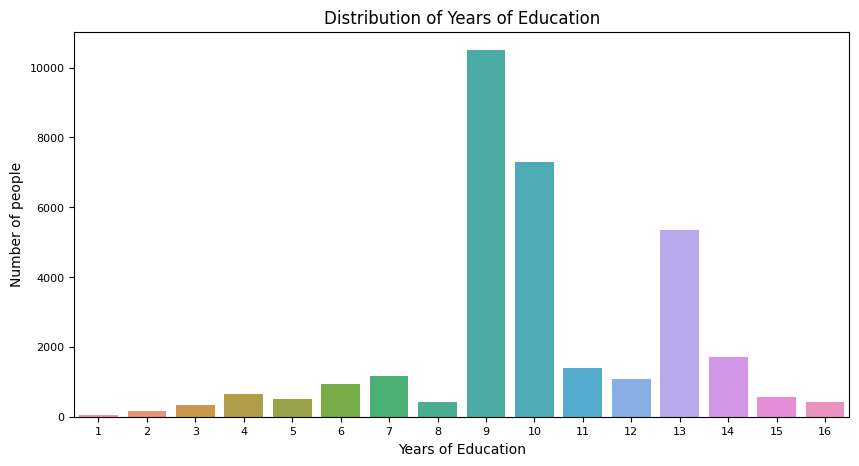

In [10]:
# Creating a barplot for 'Years of Education'
edu_num = dataset['education.num'].value_counts()

# plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
sns.barplot(x=edu_num.index, y=edu_num.values)
plt.title('Distribution of Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=8)
plt.show()

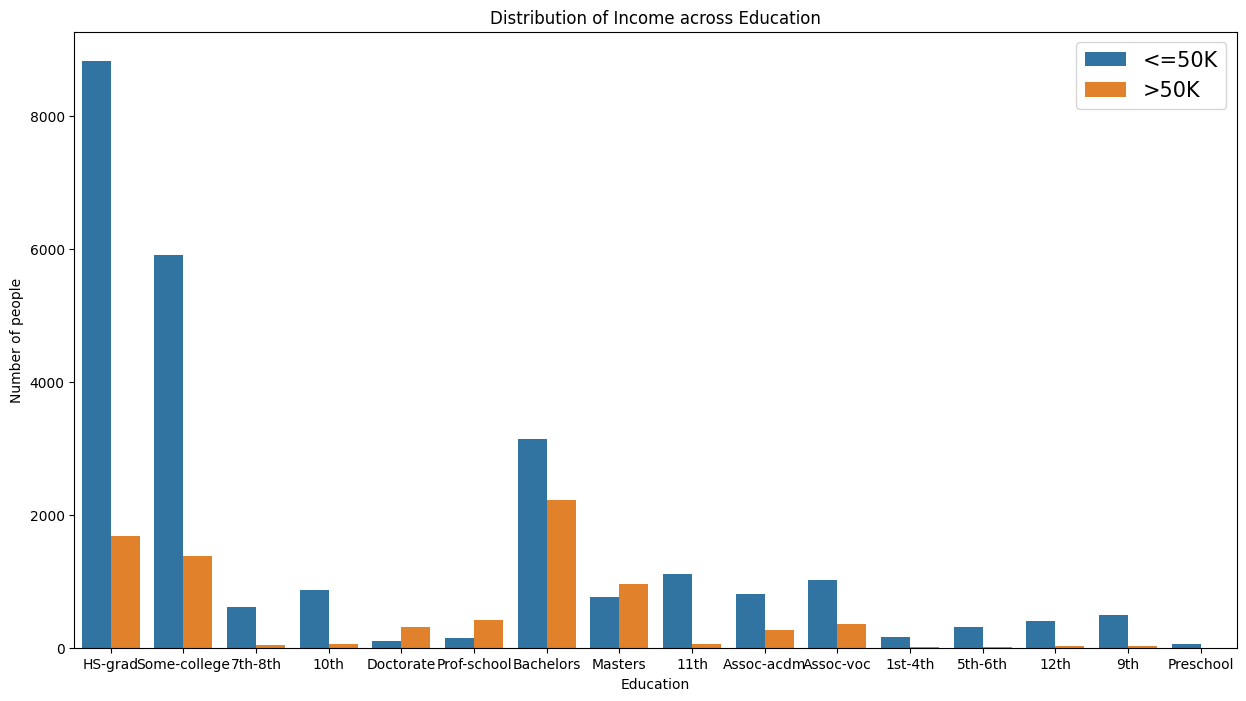

In [11]:
# Creating a countplot of income across education

plt.figure(figsize=(15, 8))
sns.countplot(x=dataset['education'], hue=dataset['income'])
plt.title('Distribution of Income across Education')
plt.xlabel('Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

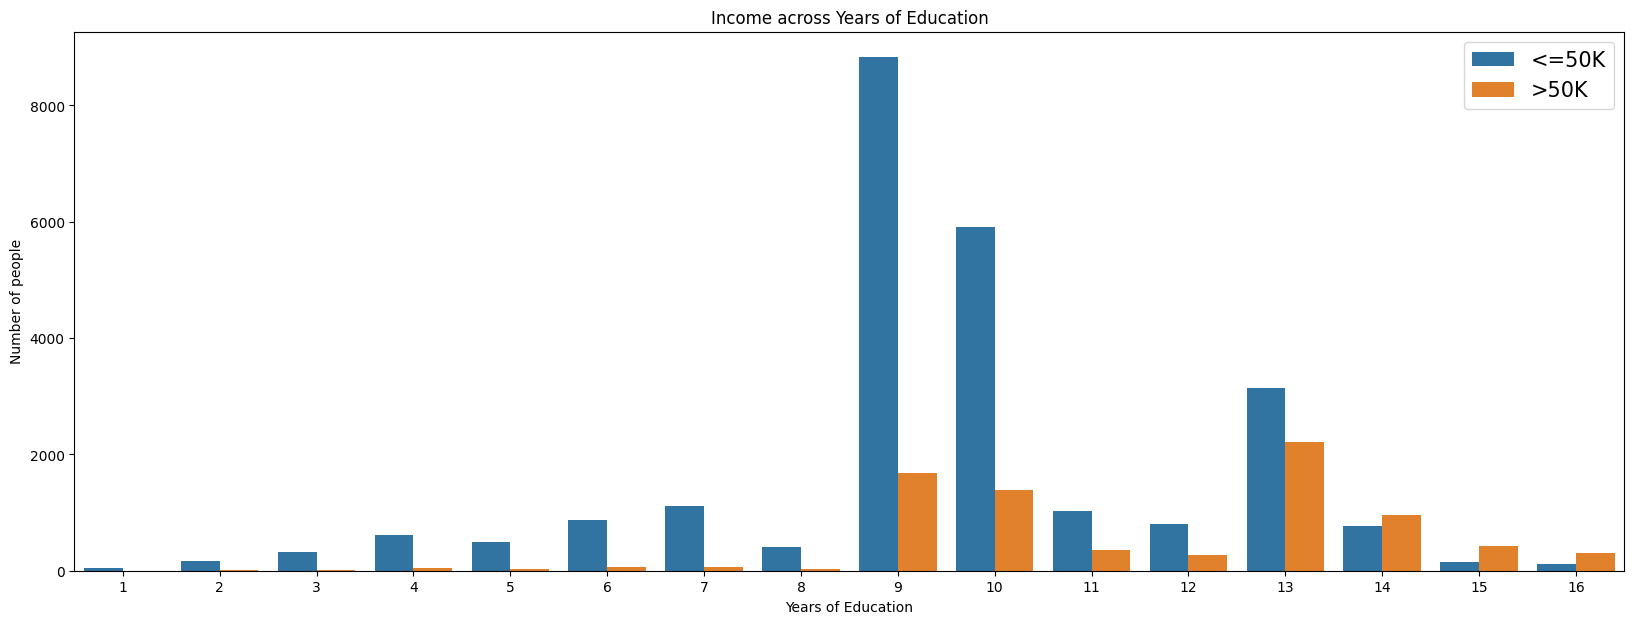

In [12]:
# Creating a countplot of income across years of education

plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['education.num'], hue=dataset['income'])
plt.title('Income across Years of Education')
plt.xlabel('Years of Education')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 15})
plt.show()

> From the analysis, we can see that
> - There is a high percentage of people who have not finished the high school
> - The percentage of people who have a salary >50k rises sharply when they have a bigger number of education.

### ***Question 2: Who are more likely to get a high salary job?***

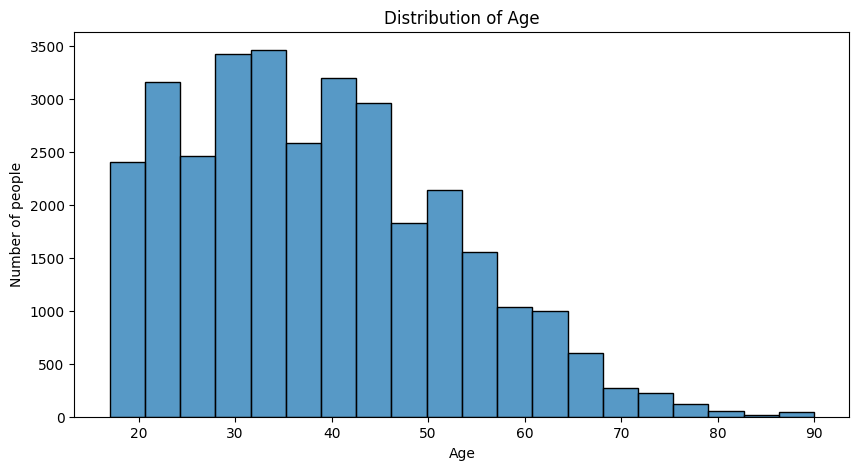

In [13]:
# Creating a distribution plot for 'Age'

plt.figure(figsize=(10, 5))
sns.histplot(dataset['age'], bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.show()

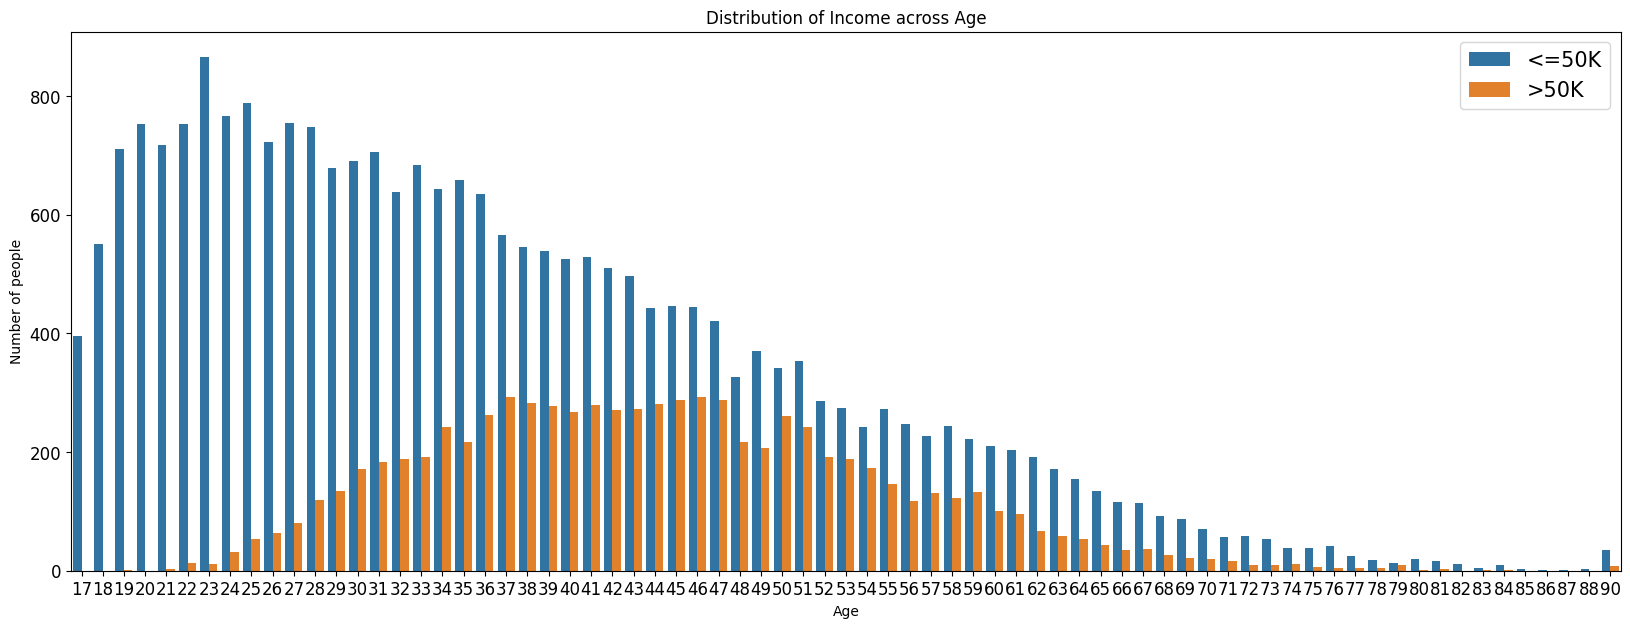

In [14]:
# Creating a countplot of income across age

plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['age'], hue=dataset['income'])
plt.title('Distribution of Income across Age')
plt.xlabel('Age')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

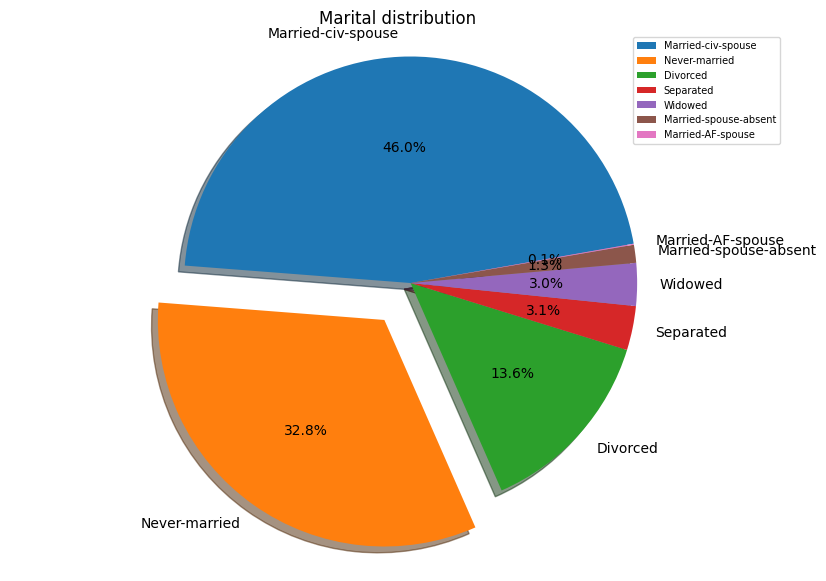

In [15]:
# Creating a pie chart for 'Marital status'

marital = dataset['marital.status'].value_counts()

plt.style.use('default')
plt.figure(figsize=(10, 7))
plt.pie(marital.values, labels=marital.index, startangle=10, explode=(
    0, 0.20, 0, 0, 0, 0, 0), shadow=True, autopct='%1.1f%%')
plt.title('Marital distribution')
plt.legend()
plt.legend(prop={'size': 7})
plt.axis('equal')
plt.show()

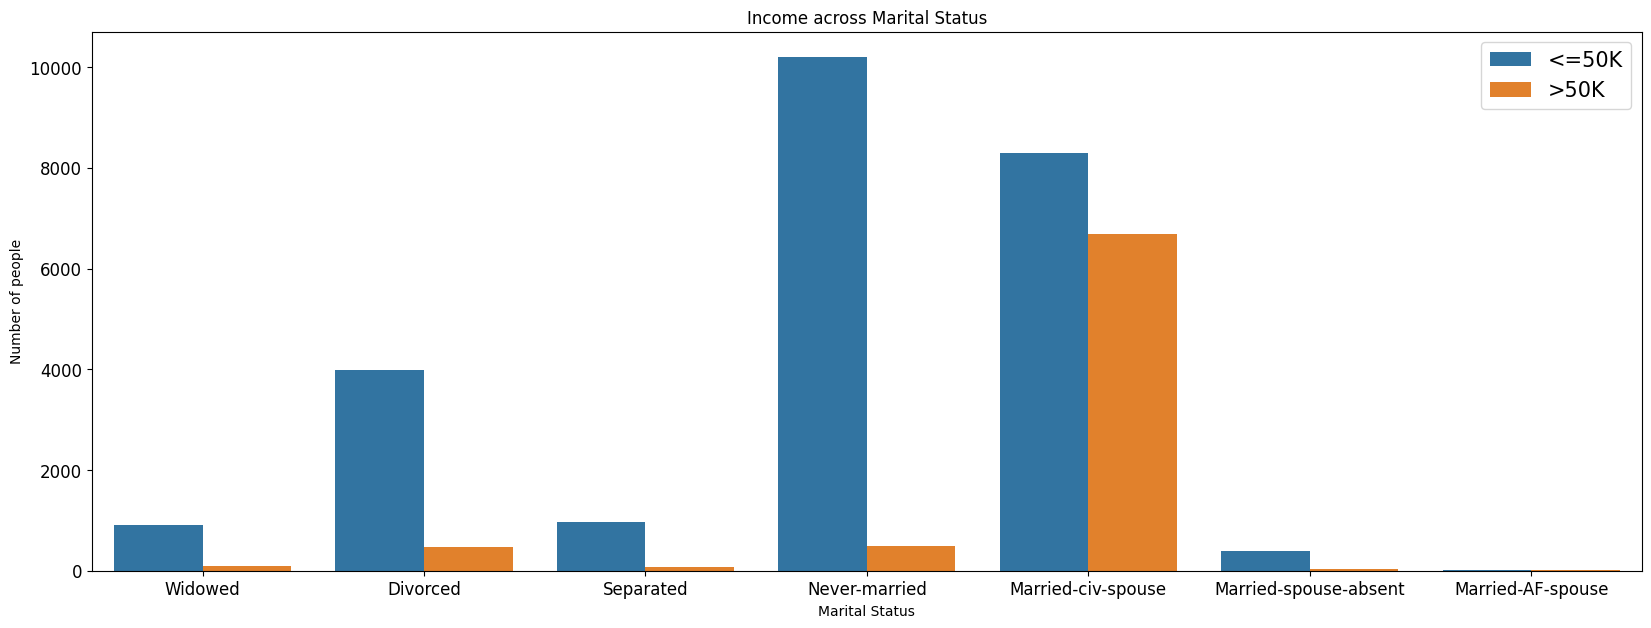

In [16]:
# Creating a countplot of income across Marital Status

plt.figure(figsize=(20, 7))
sns.countplot(x=dataset['marital.status'], hue=dataset['income'])
plt.title('Income across Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

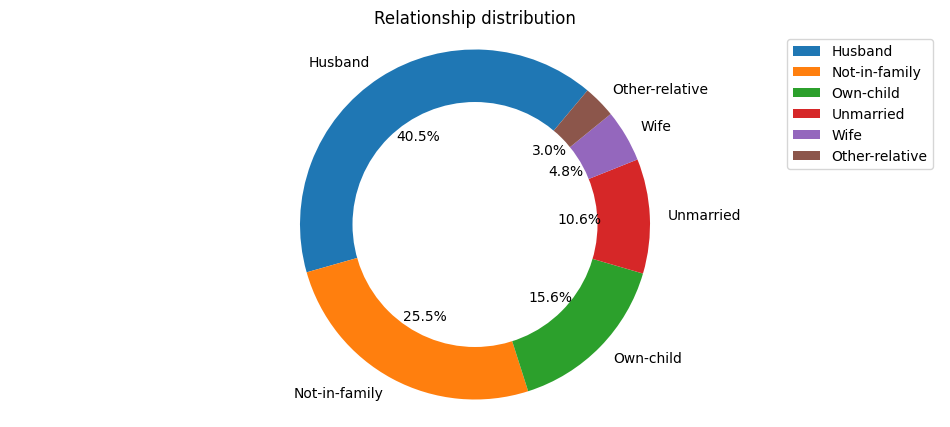

In [17]:
# Creating a donut chart for 'Relationship'
relation = dataset['relationship'].value_counts()

plt.figure(figsize=(12, 5))
plt.pie(relation.values, labels=relation.index,
        startangle=50, autopct='%1.1f%%')
centre_circle = plt.Circle((0, 0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Relationship distribution')
plt.axis('equal')
plt.legend(prop={'size': 10})
plt.show()

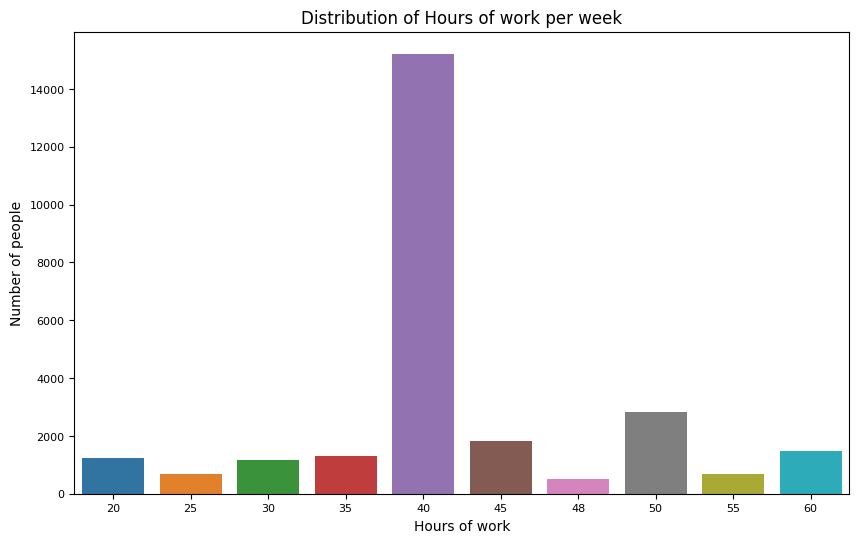

In [18]:
# Creating a barplot for 'Hours per week'

hours = dataset['hours.per.week'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=hours.index, y=hours.values)
plt.title('Distribution of Hours of work per week')
plt.xlabel('Hours of work')
plt.ylabel('Number of people')
plt.tick_params(labelsize=8)
plt.show()

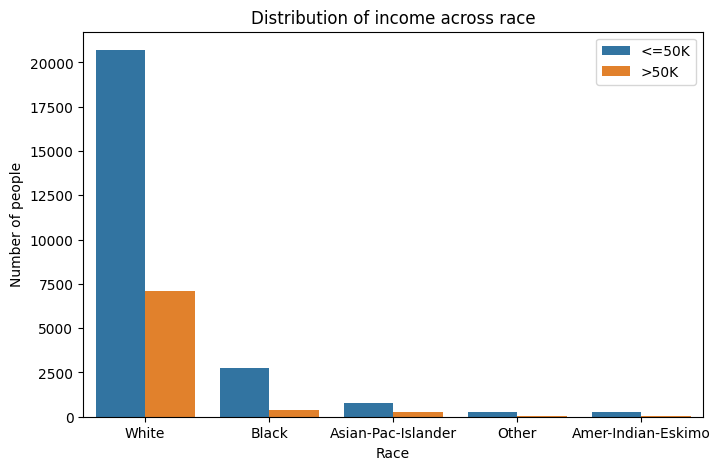

In [19]:
# Creating a countplot of income across race

plt.figure(figsize=(8, 5))
sns.countplot(x=dataset['race'], hue=dataset['income'])
plt.title('Distribution of income across race')
plt.xlabel('Race')
plt.ylabel('Number of people')
plt.tick_params(labelsize=10)
plt.legend(loc=1, prop={'size': 10})
plt.show()

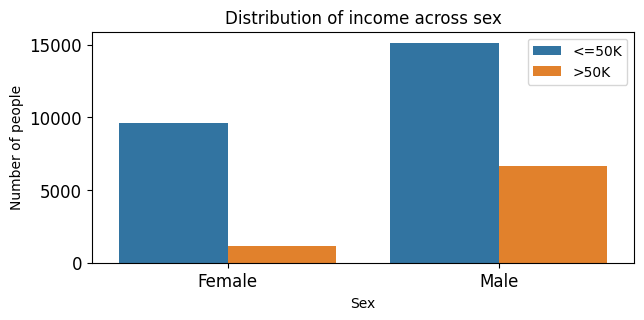

In [20]:
# Creating a countplot of income across sex

plt.figure(figsize=(7, 3))
sns.countplot(x=dataset['sex'], hue=dataset['income'])
plt.title('Distribution of income across sex')
plt.xlabel('Sex')
plt.ylabel('Number of people')
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 10})
plt.show()

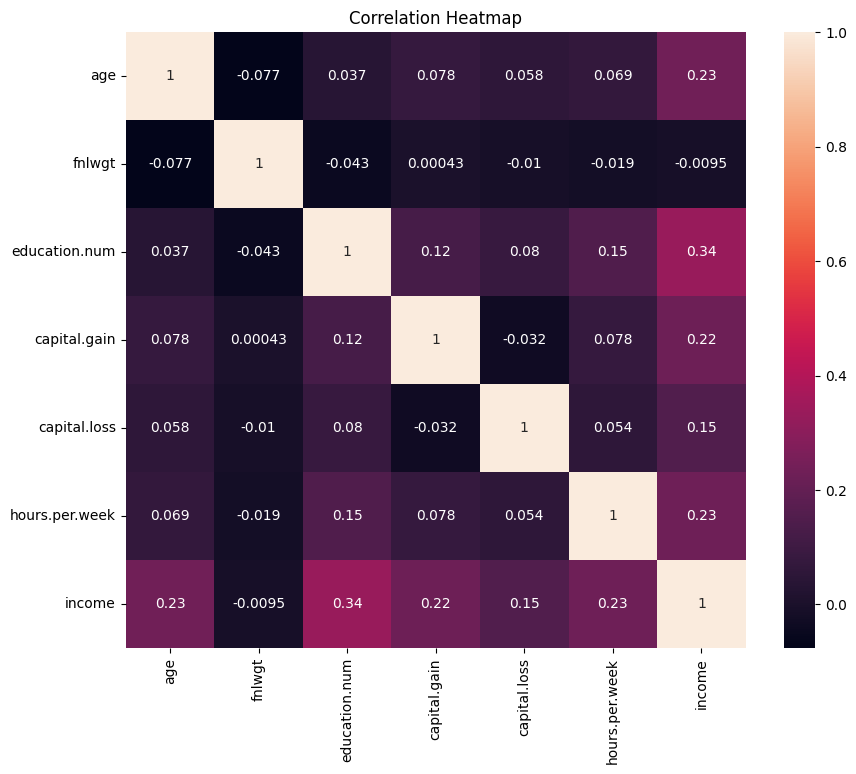

In [21]:
# Change income into numeric 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
dataset['income'] = le.fit_transform(dataset['income'])

# Draw correlation heat map
plt.figure(figsize=(10, 8)) 
sns.heatmap(dataset.corr(numeric_only=True), annot=True)
plt.title("Correlation Heatmap")
plt.show()

> From the analysis, we can see that:
> - The most number of people are young, white, male, high school graduates with 9 to 10 years of education and work 40 hours per week.
> - People who are more likely to get a good salary are married husband, 37-47 years old, and white.
> - From the correlation heatmap, we can see that the dependent feature 'income' is highly correlated with numbers of years of education, age, number of hours per week, and capital gain.

### ***Question 3: Which model is the best way to predict salary range?***


## 3. Data Preparation

In [22]:
# Replace '?' values by NaN
dataset = dataset.replace('?', np.nan)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [23]:
# Replace NaN by mode values
columns_with_nan = ['workclass', 'occupation', 'native.country']
for col in columns_with_nan:
    dataset[col].fillna(dataset[col].mode()[0], inplace=True)

dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  int64 
dtypes: int64(7), object(8)
memory usage: 3.7+ MB


In [24]:
# Label Encoding

for col in dataset.columns:
    if dataset[col].dtypes == 'object':
        encoder = LabelEncoder()
        dataset[col] = encoder.fit_transform(dataset[col])

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education.num   32561 non-null  int64
 5   marital.status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital.gain    32561 non-null  int64
 11  capital.loss    32561 non-null  int64
 12  hours.per.week  32561 non-null  int64
 13  native.country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


In [25]:
# Feature selection

X = dataset.drop('income', axis=1)
y = dataset['income']

selector = ExtraTreesClassifier(random_state=42)
selector.fit(X, y)
feature_imp = selector.feature_importances_

for index, val in enumerate(feature_imp):
    print(index, round((val * 100), 2))

0 15.59
1 4.13
2 16.71
3 3.87
4 8.66
5 8.04
6 7.27
7 8.62
8 1.47
9 2.84
10 8.83
11 2.81
12 9.64
13 1.53


In [26]:
X = X.drop(['workclass', 'education', 'race', 'sex',
            'capital.loss', 'native.country'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   fnlwgt          32561 non-null  int64
 2   education.num   32561 non-null  int64
 3   marital.status  32561 non-null  int64
 4   occupation      32561 non-null  int64
 5   relationship    32561 non-null  int64
 6   capital.gain    32561 non-null  int64
 7   hours.per.week  32561 non-null  int64
dtypes: int64(8)
memory usage: 2.0 MB


In [27]:
# Feature scaling

for col in X.columns:
    scaler = StandardScaler()
    X[col] = scaler.fit_transform(X[col].values.reshape(-1, 1))

X.head()

,age,fnlwgt,education.num,marital.status,occupation,relationship,capital.gain,hours.per.week
0,3.769612,-1.067997,-0.420060,2.249480,0.720237,-0.277805,-0.14592,-0.035429
1,3.183112,-0.539169,-0.420060,2.249480,-0.790092,-0.277805,-0.14592,-1.817204
2,2.010110,-0.035220,-0.031360,2.249480,0.720237,1.589322,-0.14592,-0.035429
3,1.130359,-0.468215,-2.363558,-1.734058,-0.034928,1.589322,-0.14592,-0.035429
4,0.177296,0.709482,-0.031360,1.585557,0.720237,0.966947,-0.14592,-0.035429


In [28]:
# Oversampling to fix imbalanced
ros = RandomOverSampler(random_state=42)
ros.fit(X, y)
X_resampled, y_resampled = ros.fit_resample(X, y)

round(y_resampled.value_counts(normalize=True) * 100, 2).astype('str') + ' %'

income
0    50.0 %
1    50.0 %
Name: proportion, dtype: object

In [29]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape                                               

((39552, 8), (9888, 8), (39552,), (9888,))

## 4. Data Modelling

In [30]:
# Logistic Regression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [31]:
# KNN Classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [33]:
# Decision Tree
dec_tree = DecisionTreeClassifier(random_state=42)
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [34]:
# Random Forest
ran_for = RandomForestClassifier(random_state=42)
ran_for.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## 5. Results Evaluation

In [35]:
# Function to evaluate models

def evaluate_model(model, X_test=X_test, y_test=y_test):
    """
    Description: This function can be used to return the scores for one specific model in the defined test dataframes.

    Arguments:
    model: model name
    X_test: test dataframe for features
    y_test: test dataframe for target

    Returns:
    acc: the score for Accuracy 
    prec: the score for Precision
    rec: the score for Recall
    f1: the score for F1
"""
    
    # Generate predictions with the regressor
    y_pred = model.predict(X_test)

    # Compute evaluation metrics
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    prec = round(precision_score(y_test, y_pred) * 100, 2)
    rec = round(recall_score(y_test, y_pred) * 100, 2)
    f1 = round(f1_score(y_test, y_pred) * 100, 2)

    return acc, prec, rec, f1

In [36]:
# Model Scores
e1 = evaluate_model(log_reg)
e2 = evaluate_model(knn)
e3 = evaluate_model(nb)
e4 = evaluate_model(dec_tree)
e5 = evaluate_model(ran_for)

# Create column names (optional)
scores = ['Accuracy', 'Precision', 'Recall', 'F1']
names = ['Logistic Regression', 'KNN', 'Naive Bayes', 'Decision Tree', 'Random Forest']

# Convert the list of tuples into a DataFrame
df = pd.DataFrame(data = [e1, e2, e3, e4, e5], 
                  index = names,
                  columns=scores)

# Display the DataFrame
print(df)

                     Accuracy  Precision  Recall     F1
Logistic Regression     75.25      75.44   74.72  75.08
KNN                     83.42      79.43   90.11  84.43
Naive Bayes             64.68      89.22   33.23  48.42
Decision Tree           91.61      87.57   96.94  92.01
Random Forest           92.60      88.70   97.59  92.93


> We can see that Decision Tree and KNN have good scores. However, Random Forest gives the highest performance.